In [2]:
# import all the modules 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

/Users/lorenzospera/Library/Python/3.9/lib/python/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


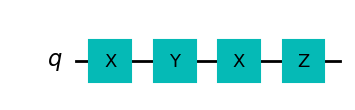

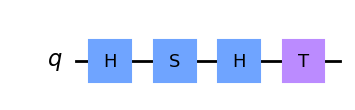

In [3]:
# let us now create a simple cirucit that acts on a single qubit
# in particular, the operations are as follows: we first perform an X gate, Y gate, Z gate and Z gate (ZXYX)

circuit  = QuantumCircuit(1)
circuit.x(0)
circuit.y(0)
circuit.x(0)
circuit.z(0)

# display the circuit and check whether the operations are correct
display(circuit.draw(output = "mpl"))

# another example is 

cicrcuit_1 = QuantumCircuit(1)
cicrcuit_1 .h(0)
cicrcuit_1.s(0)
cicrcuit_1.h(0)
cicrcuit_1.t(0)
display(cicrcuit_1.draw(output = "mpl"))



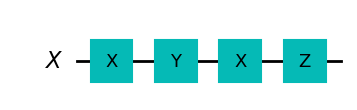

In [4]:
# if we wish to change the default name of the qubit we may use the Quantum_Register class
X = QuantumRegister(1, "X")             # 1 qubit named X
circuit = QuantumCircuit(X)
circuit.x(0)
circuit.y(0)
circuit.x(0)
circuit.z(0)
display(circuit.draw(output = "mpl"))



If we wish to operate on multiple qubits, it is useful to know Qiskit oredirng convention of qubits. Say we have $n$ qubits which can be represented as $(q_0,q_1, \dots, q_{n-1})$. In the circuit diagram $q_0$ is the topmost quibit, while $q_{n-1}$ is the bottom-most qubit. If these qubit appear in a tensor product, the qubit $q_0$ corresponds to the rightmost qubit in the tensor product and the same goes for the other qubits. In our example, if the take the tensor product state we would have:
$$\ket{q_{n-1}\dots q_1q_0} = \ket{q_{n-1}}\otimes \dots \otimes \ket{q_1}\otimes \ket{q_0}$$

Let's say we want to operate on to qubits $X$ and $Y$, $(X,Y)$. With the previous notation $X$ corresponds to the bottom qubit while $Y$ to the top qubit. The input state for the circuit is the tensor product between the two states corresponding to the qubits $X$ and $Y$ :$\ket{\psi}\otimes \ket{\phi}$. 
A simple operation we can implement on this state is an Hadamard gate on the first qubit and then a CNOT operation using the first qubit as as the control qubit.

/Users/lorenzospera/Library/Python/3.9/lib/python/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


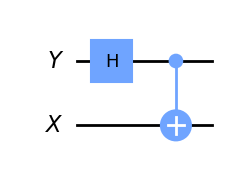

<IPython.core.display.Latex object>

In [9]:
# initialise the qubits 
X =  QuantumRegister(1, "X")
Y =  QuantumRegister(1, "Y")
circuit = QuantumCircuit(Y,X)

# apply the Hadamard gate on the first qubit
circuit.h(Y)

# apply the CNOT using Y as the control qubit 
circuit.cx(Y, X)

# display the circuit

display(circuit.draw(output = "mpl"))

# we can also see the matrix representation of the operator 

display(Operator.from_circuit(circuit).draw("latex"))


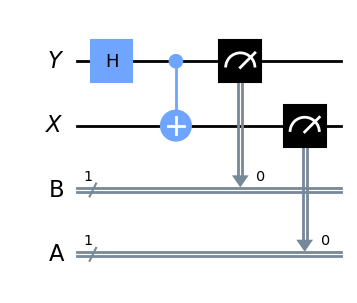

In [14]:
# we can also use classical bits to store information (i.e standard basis measurment)
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")
circuit = QuantumCircuit(Y, X,  B , A)
circuit.h(Y)
circuit.cx(Y,X)

circuit.measure(Y, B)            # performs a standard basis measurment on the qubit Y and stores the information in the classical bit B
circuit.measure(X, A)            # does the same on the qubit X with the classical bit A

display(circuit.draw(output = "mpl"))

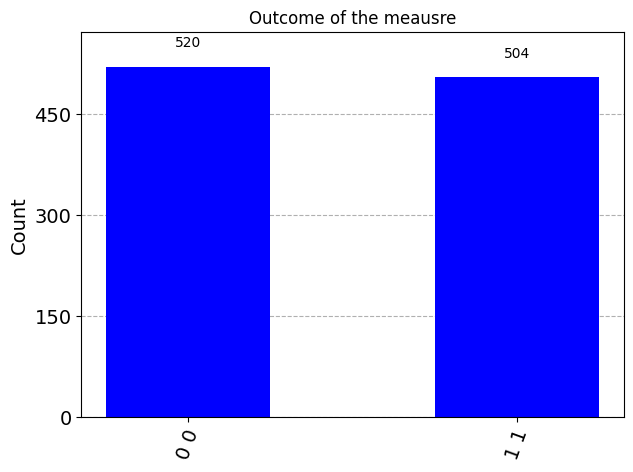

In [18]:
# we can also simulate the circuit using the aer_simulator 
results = AerSimulator().run(circuit).result()
statistics = results.get_counts()
plot_histogram(statistics, title = 'Outcome of the meausre', color = 'blue')
